In [34]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')

In [14]:
df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [15]:
df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [17]:
df.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [25]:
df.groupby(df.index.weekday).agg({"Rachel1": [np.mean, np.std]})

Rachel1             
             mean          std
Date                          
0     2891.777778  2010.232538
1     2729.272727  1939.308512
2     3024.727273  2044.024705
3     3187.295455  2116.135108
4     3119.431818  2222.013621
5     2564.272727  1964.864719
6     2603.333333  2014.706836

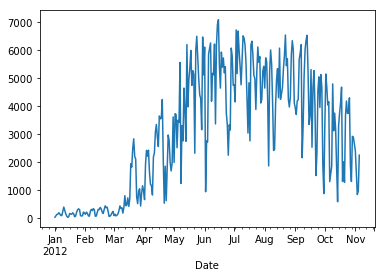

In [26]:
df['Berri 1'].plot()

In [32]:
df['weekday'] = df.index.weekday
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df[:5]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),weekday,day,month,year
Date,,,,,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN,6,1,1,2012
2012-01-02,83,NaN,1,68,153,53,6,43,NaN,0,2,1,2012
2012-01-03,135,NaN,2,104,248,89,3,58,NaN,1,3,1,2012
2012-01-04,144,NaN,1,116,318,111,8,61,NaN,2,4,1,2012
2012-01-05,197,NaN,2,124,330,97,13,95,NaN,3,5,1,2012


In [35]:
weekday_counts = df.groupby('weekday').aggregate(sum)['Berri 1']
weekday_counts
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

weekday
0    134298
1    135305
2    152972
3    160131
4    141771
5    101578
6     99310
Name: Berri 1, dtype: int64

Monday       134298
Tuesday      135305
Wednesday    152972
Thursday     160131
Friday       141771
Saturday     101578
Sunday        99310
Name: Berri 1, dtype: int64

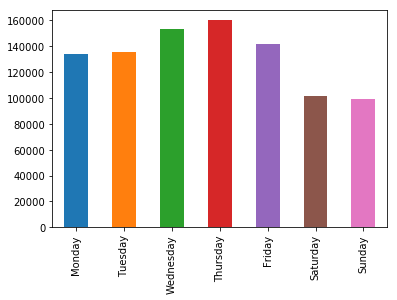

In [36]:
weekday_counts.plot(kind='bar')

In [38]:
weather = pd.read_csv('weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [48]:
weather['weekday'] = weather.index.weekday
weather['day'] = weather.index.day
weather['hour'] = weather.index.hour
weather['week'] = weather.index.week


In [49]:
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,weekday,day,hour,week
Date/Time,,,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,6,1,0,52
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,6,1,1,52
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",6,1,2,52
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",6,1,3,52
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,6,1,4,52


In [55]:
index = weather.Weather.str.contains("Snow")

In [97]:
tmp = weather[index].groupby('Weather').agg({"Temp (C)": [np.mean, np.std, np.size]})

In [98]:
tmp.columns = tmp.columns.droplevel(0)
tmp.columns
tmp['size'] = tmp['size'].astype(int)
tmp

Index(['mean', 'std', 'size'], dtype='object')

,mean,std,size
Weather,,,
"Drizzle,Snow",1.050000,0.212132,2
"Drizzle,Snow,Fog",0.693333,0.317280,15
"Freezing Drizzle,Snow",-5.109091,1.705552,11
"Freezing Rain,Snow Grains",-5.000000,NaN,1
Moderate Snow,-5.525000,0.613052,4
"Moderate Snow,Blowing Snow",-5.450000,0.070711,2
"Rain Showers,Snow Showers",2.150000,0.070711,2
"Rain,Snow",1.055556,0.279121,18
"Rain,Snow Grains",1.900000,NaN,1


In [59]:
weather[index]['Weather'].value_counts()

Snow                          390
Snow Showers                   60
Snow,Fog                       37
Snow,Blowing Snow              19
Rain,Snow                      18
Drizzle,Snow,Fog               15
Freezing Drizzle,Snow          11
Snow,Ice Pellets                6
Snow,Haze                       5
Rain,Snow,Ice Pellets           4
Moderate Snow                   4
Snow Showers,Fog                4
Rain Showers,Snow Showers       2
Moderate Snow,Blowing Snow      2
Drizzle,Snow                    2
Rain,Snow Grains                1
Freezing Rain,Snow Grains       1
Rain,Snow,Fog                   1
Snow Pellets                    1
Name: Weather, dtype: int64

In [60]:
weather.Weather.str.split(',')[:5]

Date/Time
2012-01-01 00:00:00                      [Fog]
2012-01-01 01:00:00                      [Fog]
2012-01-01 02:00:00    [Freezing Drizzle, Fog]
2012-01-01 03:00:00    [Freezing Drizzle, Fog]
2012-01-01 04:00:00                      [Fog]
Name: Weather, dtype: object

In [100]:
weather['Temp (C)'].resample('2M').mean()


Date/Time
2012-01-31    -7.371505
2012-03-31    -0.429444
2012-05-31    11.699180
2012-07-31    21.483811
2012-09-30    19.429372
2012-11-30     6.025342
2013-01-31    -3.306317
Name: Temp (C), dtype: float64